Team

---
1. Tarun Verma - 17HCS4142
2. Nitesh Kumar - 17HCS4125
3. Ricky Rajat Kerketta - 17HCS4162


---




#Fake News Detection

Fake news is a term that has been used to describe very different issues, from satirical articles to completely fabricated news and plain government propaganda in some outlets. Fake news, information bubbles, news manipulation and the lack of trust in the media are growing problems with huge ramifications in our society. However, in order to start addressing this problem, we need to have an understanding on what Fake News is. Only then can we look into the different techniques and fields of machine learning (ML), natural language processing (NLP) and artificial intelligence (AI) that could help us fight this situation.

##What is Fake News ?
“Fake news” has been used in a multitude of ways in the last half a year and multiple definitions have been given. For instance, the New York times defines it as “a made-up story with an intention to deceive”. This definition focuses on two dimensions: the intentionality (very difficult to prove) and the fact that the story is made up.

First Draft News, an organisation dedicated to improving skills and standards in the reporting and sharing of online information, has published a great article that explains the fake news environment and proposes 7 types of fake content:

1. False Connection: Headlines, visuals or captions don’t support the content
2. False Context: Genuine content is shared with false contextual information
3. Manipulated content: Genuine information or  imagery is manipulated
4. Satire or Parody: No intention to cause harm but potential to fool
5. Misleading Content: Misleading use of information to frame an issue/individual
6. Imposter Content: Impersonation of genuine sources
7. Fabricated content: New content that is 100% false

In this notebook, we'll build models to for classification of fake news dataset which is available in kaggle librabry.

In [0]:
import pandas as pd
import numpy as np
import itertools
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Exploration

To begin, we should  take a quick look at the data and get to know its contents. To do so, use a Pandas DataFrame and check the shape, head and apply any necessary transformations.

<br>DataSource: <br>
[https://www.kaggle.com/rchitic17/real-or-fake](https://www.kaggle.com/rchitic17/real-or-fake)<br>

In [0]:
#FOR GOOGLE COLAB

# from google.colab import files
# import io

# uploaded = files.upload()
# df = pd.read_csv(io.StringIO(uploaded['fake_or_real_news.csv'].decode('utf-8')))

In [4]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/My Drive/DataSets/fake_or_real_news.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df.shape

(6335, 4)

In [6]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [0]:
df = df.set_index('Unnamed: 0')

In [8]:
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Extracting the training data

In [0]:
y = df.label

In [0]:
df = df.drop('label', axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

### Building Vectorizer Classifiers

Now that we have our training and testing data, we can build our classifiers. To get a good idea if the words and tokens in the articles had a significant impact on whether the news was fake or real, we begin by using `CountVectorizer` and `TfidfVectorizer`.  

This code has a max threshhold set at `.7` for the TF-IDF vectorizer `tfidf_vectorizer` using the `max_df` argument. This removes words which appear in more than 70% of the articles. Also, the built-in `stop_words` parameter will remove English stop words from the data before making vectors. 

In [0]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [0]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

Now that we have vectors, we can then take a look at the vector features, stored in `count_vectorizer` and `tfidf_vectorizer`. 


In [14]:
tfidf_vectorizer.get_feature_names()[-10:]

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

In [15]:
count_vectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

#### Count versus TF-IDF Features


As we can see by running the cells below, both vectorizers extracted the same tokens, but obviously have different weights. Likely, changing the `max_df` and `min_df` of the TF-IDF vectorizer could alter the result and lead to different features in each.

In [0]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [0]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [18]:
set(count_df.columns).symmetric_difference(tfidf_df.columns)

set()

In [19]:
print(count_df.equals(tfidf_df))

False


In [20]:
count_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,001,0011,002,003,004,006,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,010,013,014,015,016,018,01am,02,020,022,023,024,025,...,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,أن,إجلاء,الأمر,الجرحى,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,001,0011,002,003,004,006,006s,007,007s,008,008s,009,0099,00am,00p,00pm,01,010,013,014,015,016,018,01am,02,020,022,023,024,025,...,שולטים,שזו,שטחים,שינוי,שיתעקש,שכל,שכמוני,של,שלו,שנדרש,שני,שעת,שתי,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,أن,إجلاء,الأمر,الجرحى,الدولية,القادمون,اللجنة,تحتاج,تعرفه,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Comparing Models

In [0]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
clf = MultinomialNB() 

accuracy:   0.8565279770444764
Confusion matrix, without normalization


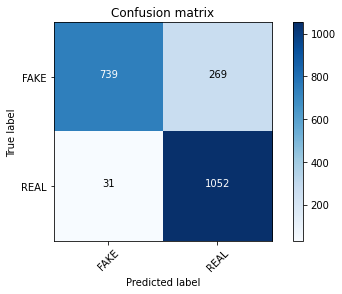

In [24]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:  ", score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [0]:
clf = MultinomialNB() 

accuracy:    0.893352462936394
Confusion matrix, without normalization


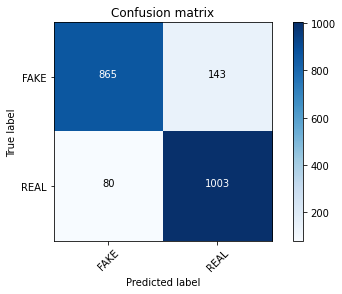

In [26]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   " ,score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

###Linear Model

In [0]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:    0.9344811095169775
Confusion matrix, without normalization


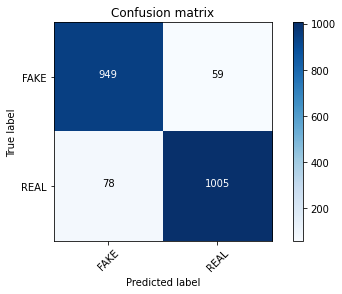

In [28]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   " , score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

####Testing MultinomialNB

In [0]:
clf = MultinomialNB(alpha=0.1)

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


### Introspecting models

It only works for binary classificaiton (classifiers with 2 classes), but its good, since we only have FAKE or REAL labels. 

Using your best performing classifier with your TF-IDF vector dataset (`tfidf_vectorizer`) and Passive Aggressive classifier (`linear_clf`), inspect the top 30 vectors for fake and real news:

In [32]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -4.941138071860564 2016
FAKE -4.267437665168665 october
FAKE -4.15781811121193 hillary
FAKE -3.370020647200062 share
FAKE -3.0998583988962607 article
FAKE -2.9359678255939885 november
FAKE -2.6284204338025776 print
FAKE -2.4859728407406143 oct
FAKE -2.2551327480641787 email
FAKE -2.2289920483720356 advertisement
FAKE -2.146654337502859 war
FAKE -2.1381396581518777 establishment
FAKE -2.0927569128563017 election
FAKE -2.092358558325431 source
FAKE -1.99507464506284 nov
FAKE -1.9409400900835165 podesta
FAKE -1.9032210433755128 mosul
FAKE -1.8771282929304507 photo
FAKE -1.847116556465517 com
FAKE -1.8470242441211886 wikileaks
FAKE -1.8305321516634134 snip
FAKE -1.7670363020071465 brexit
FAKE -1.766410440010388 donald
FAKE -1.7474352318896704 corporate
FAKE -1.7404350789684495 fbi
FAKE -1.7345498937439625 jewish
FAKE -1.7290426196009372 26
FAKE -1.7164819929061488 ayotte
FAKE -1.6357949509427834 28
FAKE -1.629919218368498 reuters

REAL 4.931773772991983 said
REAL 2.7319972413174085 tu

Alternatively

In [0]:
feature_names = tfidf_vectorizer.get_feature_names()

In [34]:
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.257361214701583, 'trump'),
 (-6.494453094312678, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.037944662867073, 'obama'),
 (-7.146539983381228, 'sanders'),
 (-7.215376008647511, 'president'),
 (-7.266562805741618, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.341118458599064, 'state'),
 (-7.341357110247905, 'cruz'),
 (-7.378312441985425, 'party'),
 (-7.44688067245789, 'new'),
 (-7.476288801154588, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.580150633909893, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.634478172520314, 'voters'),
 (-7.648482443695299, 'rubio'),
 (-7.6734836186463795, 'states')]

In [35]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

In [46]:
my_news = [input()]
print(shape(my_news))
my_vector = tfidf_vectorizer.transform(my_news)
pred = linear_clf.predict(my_vector)
print(pred)

Former U.S. Ambassador to China Gary Locke is denouncing U.S. President Donald Trump for a new campaign ad that seems to falsely imply Locke was a Chinese official.   Trump’s Republican reelection campaign released an ad Thursday that accused former Vice-President Joe Biden, the presumptive Democratic presidential nominee, of being too cozy with China. It featured an image of Biden and Locke on a stage with U.S. and Chinese flags in the background.Locke, an Asian American, said Friday that Trump and his team are “fanning hatred” at a time when hate crimes and discrimination against Asian Americans are on the rise. He said in a statement that “the Trump team is making it worse” and that “Asian Americans are Americans. Period.”  Locke was an ambassador during the Obama administration and also served as U.S. commerce secretary. He served as governor of Washington from 1997 to 2005.
(1,)
['REAL']


## Conclusion
<br><h4>
Our accuracies for the models are as follows.</h4> <br>



* MultinomialNB  - 89.33%<br>
* Linear Model - 93.63%<br>

<br><br>


Thank You!